<a href="https://colab.research.google.com/github/AlyAbdulloh/Machine-Learning-semester5/blob/main/JS04/JS04_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 3

Pada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.

## Mendefiniskan Data Dummy

In [1]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 46 144]
 [148  71]
 [129  30]
 [154  47]
 [122 132]
 [ 71 109]
 [165  25]
 [121  94]
 [ 40 104]
 [ 13  80]
 [ 48  89]
 [ 17  69]
 [143 118]
 [199 101]
 [ 12  72]
 [132  96]
 [108 143]
 [130 252]
 [109 142]
 [ 91  92]
 [ 27  23]
 [125 129]
 [ 85  28]
 [104 114]
 [141 154]
 [ 81  96]
 [127 120]
 [ 71  76]
 [106 108]
 [ 71  61]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Parameter yang digunakan pada fungsi make_classification adalah,

*   n_samples: jumlah sampel yang diinginkan
*   n_features: jumlah fitur yang digunakan
*   n_classes: jumlah kelas
*   n_informative: jumlah fitur yang memiliki korelasi dengan kelas
*   n_informative: jumlah fitur yang memiliki korelasi dengan kelas
*   n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas
*   n_repeated: jumlah fitur yang diulang







## (Opsional) Membuat Data Frame

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya

In [2]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,46,144,0
1,148,71,0
2,129,30,0
3,154,47,0
4,122,132,0


Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [3]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,46,144,Kelas B
1,148,71,Kelas B
2,129,30,Kelas B
3,154,47,Kelas B
4,122,132,Kelas B


## (Opsional) Visualisasi Data

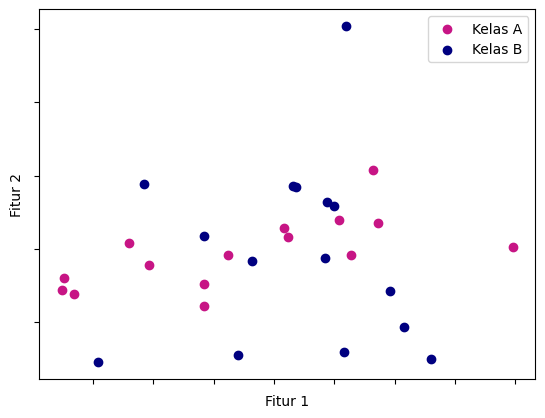

In [4]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

## Klasifikasi Multinomial Naive Bayes

In [5]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.5555555555555556


## Klasifikasi Gaussian Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.8095238095238095
Hasil akurasi data test (Gaussian): 0.5555555555555556


# Praktikum 4

## Klasifikasi Naive Bayes Pada Data Multinomial

Pada percobaan ini, kita akan menggunakan nilai multinomial untuk melakukan klasifikasi dengan Naive Bayes. Nilai multinomial adalah data yang nilainya didapatkan dari proses menghitung. Sehingga, pada konteks fitur, nilai multinomial fitur berdasarkan proses perhitungan (counting) probabilitas kemunculan fitur tersebut dalam sebuah data. Contoh klasik fitur multinomial adalah perhitungan jumlah kata pada klasifikasi teks.Pada percobaan ini, kasus klasifikasi teks diberikan untuk mempermudah pemahaman terhadap algoritma Naive Bayes tipe Multinomial.
Kita akan menggunakan data spam.csv yang berisi data teks sms dengan label spam dan ham. Spam adalah sms sampah, sedangkan ham adalah sebaliknya

## Load Data

Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan

In [17]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [21]:
import pandas as pd
import io

df2 = pd.read_csv(io.BytesIO(uploaded['spam (1).csv']), encoding='latin-1')  # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8
df2.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut. Selain itu, untuk memudahkan pembacaan data, kita juga akan mengubah nama kolom v1 yang berupa label dan v2 yang berupa teks sms

**Pra Pengolahan Data**

Beberapa hal yang akan dilakukan pada tahap ini yaitu,
1. Drop kolom yang tidak digunakan
2. Ubah nama kolom v1 (label) dan v2 (teks sms)
3. Inspeksi Data
4. Encode label
5. Memisahkan fitur dengan label

**Drop Kolom**

In [24]:
# Drop 3 kolom terakhir dengan fungsi iloc
df2 = df2.drop(df2.iloc[:,2:], axis=1)

# Cek data
df2.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Ubah Nama Kolom V1 dan V2**

In [25]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df2 = df2.rename(columns=new_cols)

# cek data
df2.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Inspeksi Data**

In [27]:
# Cek Jumlah Data Per Kelas
print(df2['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df2.info())
print('\n')

# Cek Statistik Deskriptif
print(df2.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


**Encode Label**

In [30]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df2['Labels'] = df2['Labels'].map(new_labels)

# Cek data
df2.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Memisahkan Fitur dengan Label**

In [31]:
X = df2['SMS'].values
y = df2['Labels'].values

**Ekstraksi fitur**

Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [39]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


**Training dan Evaluasi Model**

Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data testing
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data testing
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229
